In [1]:
import pandas as pd

df = pd.read_csv('../data/Benthos-Habitat-Complexity-25-26-6-83.csv')
df


,Sample Id,Category,Seagrass Wt (gms),HA,Co,AMA,AMB,AMC,AMD,AME,AMF,AMG,AM?,CU,IS,CAP,PN
0,1a,Dense,0.862,NaN,NaN,13,0,6,6,6,2,2,2,2.0,NaN,16.0,4
1,1b,Dense,1.204,NaN,NaN,13,1,0,2,0,8,1,1,2.0,NaN,9.0,2
2,1c,Dense,0.800,NaN,NaN,6,0,0,1,0,3,1,2,2.0,NaN,11.0,8
3,1d,Dense,NaN,1.0,0.0,19,0,0,3,0,5,1,1,5.0,0.0,8.0,4
4,2a,Sparse,0.136,NaN,NaN,20,4,0,14,0,2,2,9,NaN,NaN,1.0,7
5,2b,Sparse,0.212,NaN,NaN,15,2,1,6,0,4,9,0,NaN,NaN,NaN,4
6,2c,Sparse,0.098,NaN,NaN,13,2,0,19,0,3,4,0,2.0,NaN,2.0,9
7,3a,Medium,0.314,NaN,NaN,17,0,0,4,0,0,2,3,3.0,NaN,7.0,15
8,3b,Medium,0.081,NaN,NaN,3,2,1,1,0,0,0,1,NaN,NaN,2.0,8
9,3c,Medium,0.519,NaN,NaN,31,3,1,1,1,1,2,1,1.0,NaN,10.0,4


There are a number of columns where the counts are mainly zero. Remove these to reduce noise. These columns are HA, Co, and IS.

For the remaining columns where there are NaNs replace these with the means of the Category column

In [2]:
df1 = df.drop(['HA', 'Co', 'IS'], axis=1)

df1

,Sample Id,Category,Seagrass Wt (gms),AMA,AMB,AMC,AMD,AME,AMF,AMG,AM?,CU,CAP,PN
0,1a,Dense,0.862,13,0,6,6,6,2,2,2,2.0,16.0,4
1,1b,Dense,1.204,13,1,0,2,0,8,1,1,2.0,9.0,2
2,1c,Dense,0.800,6,0,0,1,0,3,1,2,2.0,11.0,8
3,1d,Dense,NaN,19,0,0,3,0,5,1,1,5.0,8.0,4
4,2a,Sparse,0.136,20,4,0,14,0,2,2,9,NaN,1.0,7
5,2b,Sparse,0.212,15,2,1,6,0,4,9,0,NaN,NaN,4
6,2c,Sparse,0.098,13,2,0,19,0,3,4,0,2.0,2.0,9
7,3a,Medium,0.314,17,0,0,4,0,0,2,3,3.0,7.0,15
8,3b,Medium,0.081,3,2,1,1,0,0,0,1,NaN,2.0,8
9,3c,Medium,0.519,31,3,1,1,1,1,2,1,1.0,10.0,4


In [7]:
df2 = df1
df2['Seagrass Wt (gms)'] = df1['Seagrass Wt (gms)'].fillna(df1['Seagrass Wt (gms)'].mean())
df2['CU'] = df1['CU'].fillna(df1['CU'].mean())
df2['CAP'] = df1['CAP'].fillna(df1['CAP'].mean())
df2

,Sample Id,Category,Seagrass Wt (gms),AMA,AMB,AMC,AMD,AME,AMF,AMG,AM?,CU,CAP,PN
0,1a,Dense,0.862000,13,0,6,6,6,2,2,2,2.000,16.000000,4
1,1b,Dense,1.204000,13,1,0,2,0,8,1,1,2.000,9.000000,2
2,1c,Dense,0.800000,6,0,0,1,0,3,1,2,2.000,11.000000,8
3,1d,Dense,0.393778,19,0,0,3,0,5,1,1,5.000,8.000000,4
4,2a,Sparse,0.136000,20,4,0,14,0,2,2,9,2.125,1.000000,7
5,2b,Sparse,0.212000,15,2,1,6,0,4,9,0,2.125,8.833333,4
6,2c,Sparse,0.098000,13,2,0,19,0,3,4,0,2.000,2.000000,9
7,3a,Medium,0.314000,17,0,0,4,0,0,2,3,3.000,7.000000,15
8,3b,Medium,0.081000,3,2,1,1,0,0,0,1,2.125,2.000000,8
9,3c,Medium,0.519000,31,3,1,1,1,1,2,1,1.000,10.000000,4


,Seagrass Wt (gms),HA,Co,AMA,AMB,AMC,AMD,AME,AMF,AMG,AM?,CU,IS,CAP,PN
Category,,,,,,,,,,,,,,,
Medium-Sparse,0.681,0.0,2.0,87,64,1,30,2,11,1,4,7.0,0.0,56.0,3
Sparse,0.856,0.0,0.0,89,70,2,40,0,9,17,10,9.0,0.0,7.0,23
Medium,0.914,0.0,0.0,51,5,2,6,1,1,4,5,4.0,0.0,19.0,27
Medium-Dense,1.771,0.0,1.0,63,13,6,39,1,0,1,7,3.0,0.0,33.0,15
Dense,2.866,1.0,0.0,51,1,6,12,6,18,5,6,11.0,0.0,44.0,18


In [8]:
df3 = df2.drop(['Sample Id'], axis=1)
df4 = df3.melt(id_vars=['Category', 'Seagrass Wt (gms)'], var_name='Species', value_name='Count')

df4

,Category,Seagrass Wt (gms),Species,Count
0,Dense,0.862000,AMA,13.0
1,Dense,1.204000,AMA,13.0
2,Dense,0.800000,AMA,6.0
3,Dense,0.393778,AMA,19.0
4,Sparse,0.136000,AMA,20.0
...,...,...,...,...
204,Medium-Dense,0.253000,PN,0.0
205,Medium-Dense,0.941000,PN,8.0
206,Medium-Sparse,0.114000,PN,0.0
207,Medium-Sparse,0.356000,PN,1.0


<AxesSubplot:xlabel='Seagrass Wt (gms)', ylabel='Count'>

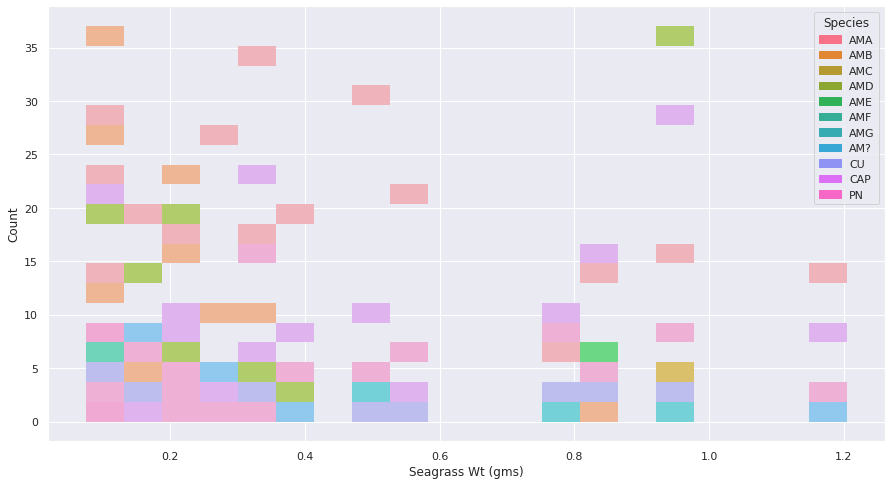

In [10]:
import seaborn as sns

sns.set(rc = {'figure.figsize': (15,8)})
sns.histplot(data=df4, x='Seagrass Wt (gms)', y='Count', hue='Species', bins=20)


In [26]:
df5 = df4.drop(['Seagrass Wt (gms)'], axis=1)
df5['Category'] = df5['Category'].replace({'Medium-Dense': 'Dense-Medium'})
df5 = df5.pivot_table(index="Category", columns="Species", values="Count", aggfunc="sum")


df5


Species,AM?,AMA,AMB,AMC,AMD,AME,AMF,AMG,CAP,CU,PN
Category,,,,,,,,,,,
Dense,6.0,51.0,1.0,6.0,12.0,6.0,18.0,5.0,44.000000,11.000,18.0
Dense-Medium,7.0,63.0,13.0,6.0,39.0,1.0,0.0,1.0,33.000000,3.000,15.0
Medium,5.0,51.0,5.0,2.0,6.0,1.0,1.0,4.0,19.000000,6.125,27.0
Medium-Sparse,4.0,87.0,64.0,1.0,30.0,2.0,11.0,1.0,56.000000,7.000,3.0
Sparse,10.0,89.0,70.0,2.0,40.0,0.0,9.0,17.0,15.833333,13.250,23.0


<AxesSubplot:xlabel='Species', ylabel='Category'>

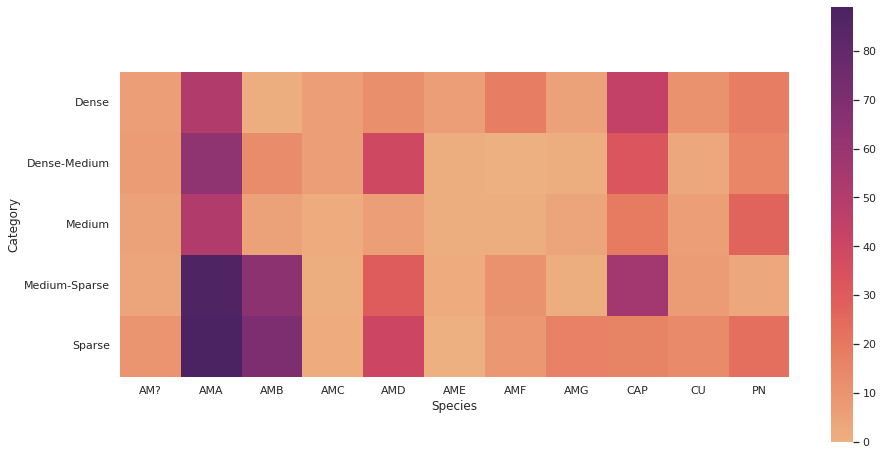

In [35]:
sns.heatmap(df5, cmap='flare', square=True)